Imports

In [63]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import math


Data loading

In [64]:
sns.set(style="whitegrid", palette="pastel")

df = pd.read_csv("../data/heart_disease.csv")
print(df.shape)
df.info()
display(df.describe(include="all"))
df.head()

(303, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


Define numeric & categorical features explicitly

In [65]:
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
cat_cols = ["sex","cp","fbs","restecg","exang","slope","thal"]
target_col = "target"

Missing values overview

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
target      0
dtype: int64


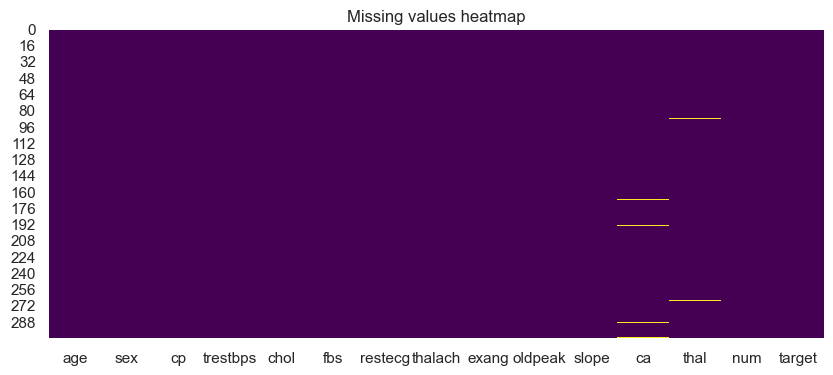

In [66]:
print("Missing values per column:")
print(df.isna().sum())

plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing values heatmap")
plt.show()

Histograms for numeric

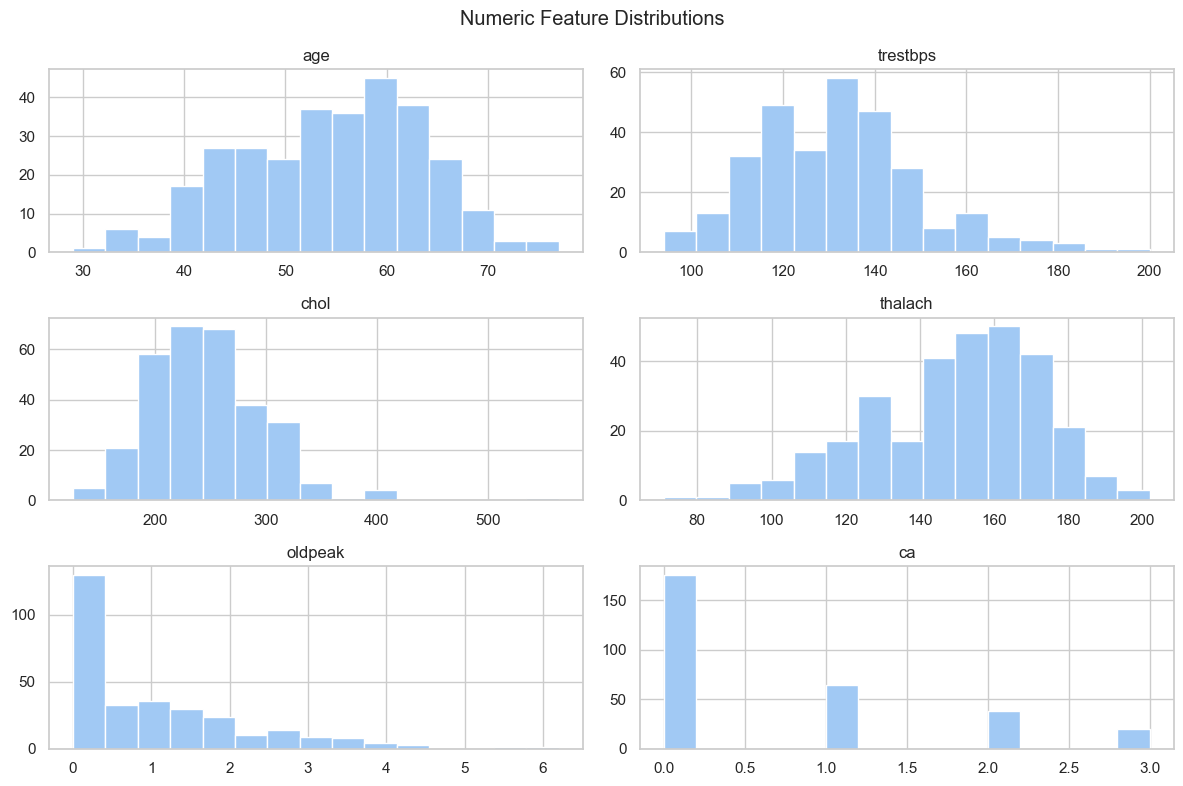

In [67]:
df[num_cols].hist(figsize=(12,8), bins=15)
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout(); plt.show()

Bar plots for categorical

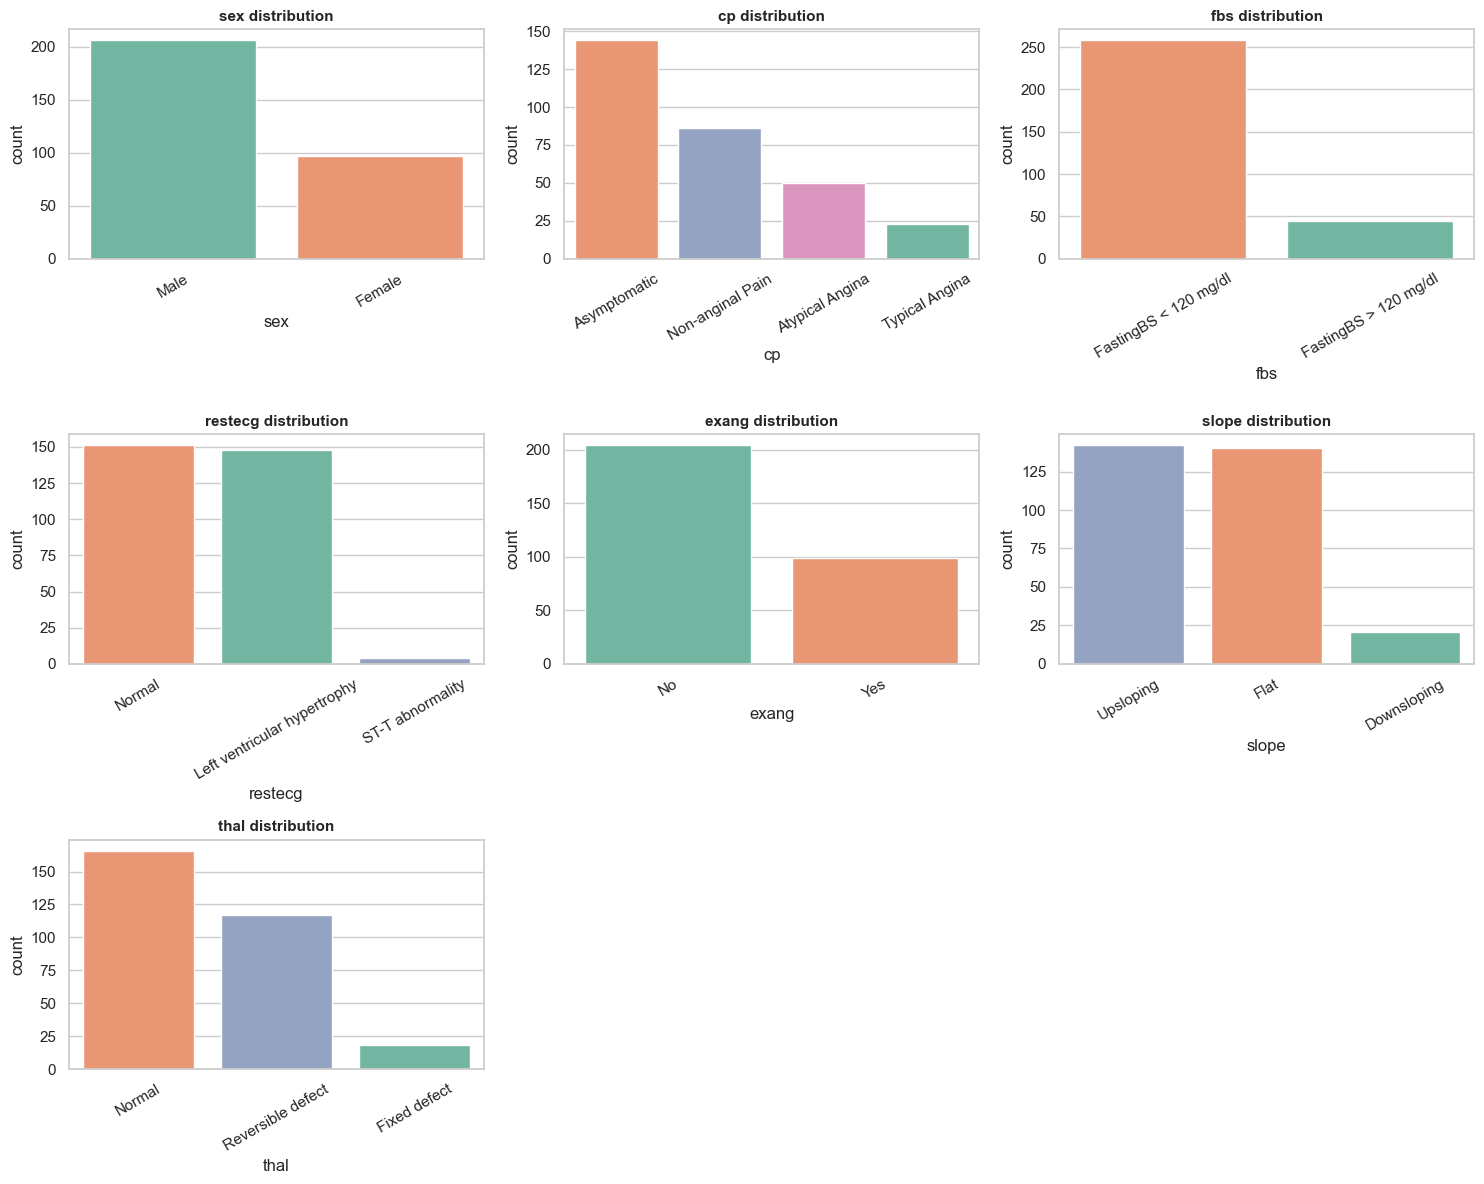

In [68]:
label_maps = {
    "sex": {0: "Female", 1: "Male"},
    "cp": {1: "Typical Angina", 2: "Atypical Angina", 3: "Non-anginal Pain", 4: "Asymptomatic"},
    "fbs": {0: "FastingBS < 120 mg/dl", 1: "FastingBS > 120 mg/dl"},
    "restecg": {0: "Normal", 1: "ST-T abnormality", 2: "Left ventricular hypertrophy"},
    "exang": {0: "No", 1: "Yes"},
    "slope": {1: "Upsloping", 2: "Flat", 3: "Downsloping"},
    "thal": {3: "Normal", 6: "Fixed defect", 7: "Reversible defect"},
}


n = len(cat_cols)
rows = math.ceil(n/3) 
fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
axes = axes.flatten()

for i, c in enumerate(cat_cols):
    ax = axes[i]
    if c in label_maps:
        mapped = df[c].map(label_maps[c])
        sns.countplot(x=mapped, hue=mapped, legend=False,
                      palette="Set2", order=mapped.value_counts().index, ax=ax)
        ax.set_xlabel(c)
    else:
        sns.countplot(x=df[c], hue=df[c], legend=False,
                      palette="Set2", ax=ax)
        ax.set_xlabel(c)
    ax.set_title(f"{c} distribution", fontsize=11, fontweight="bold")
    ax.tick_params(axis="x", rotation=30)

# Remove any empty subplot spaces
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Boxplots for outliers (numeric only)

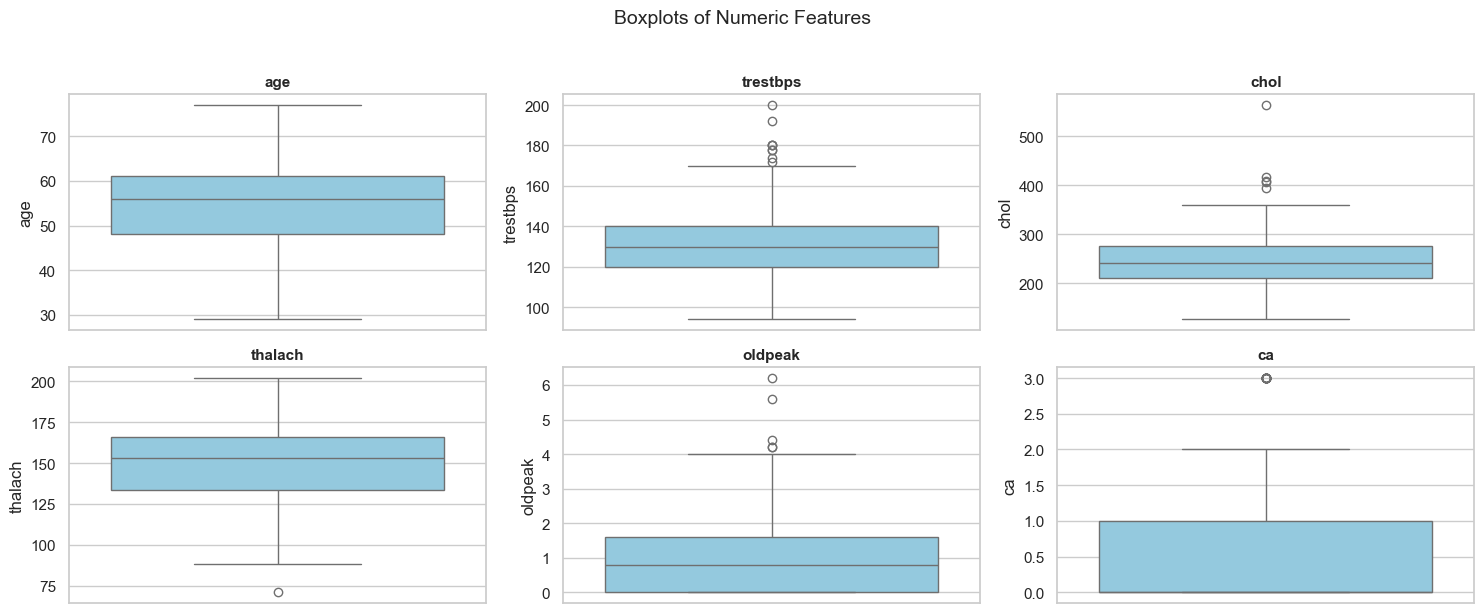

In [69]:
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]

rows = math.ceil(len(num_cols)/3)
fig, axes = plt.subplots(rows, 3, figsize=(15, 6))
axes = axes.flatten()

for i, c in enumerate(num_cols):
    sns.boxplot(y=df[c], ax=axes[i], color="skyblue")
    axes[i].set_title(c, fontsize=11, fontweight="bold")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Numeric Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


Correlation heatmap (numeric + target)

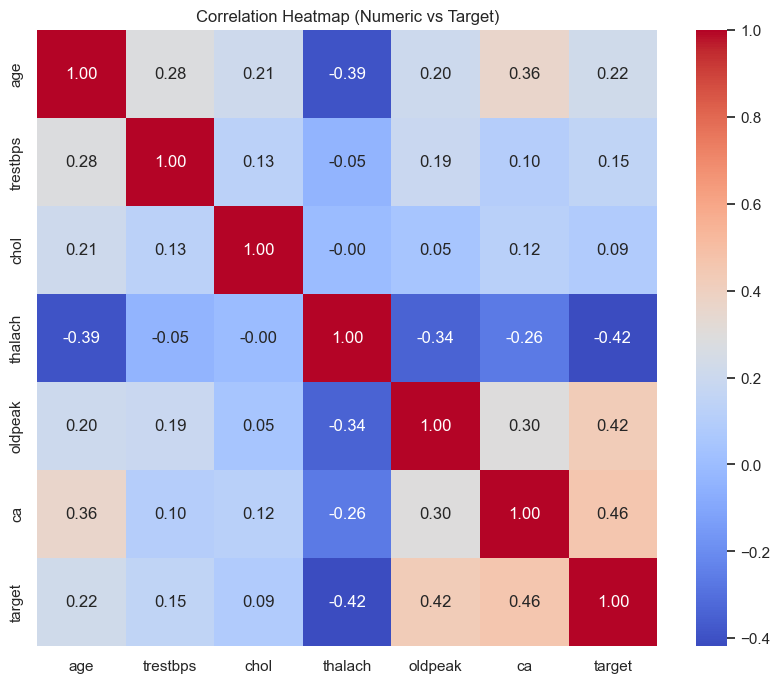

In [70]:
plt.figure(figsize=(10,8))
corr = df[num_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric vs Target)")
plt.show()

Pairplot

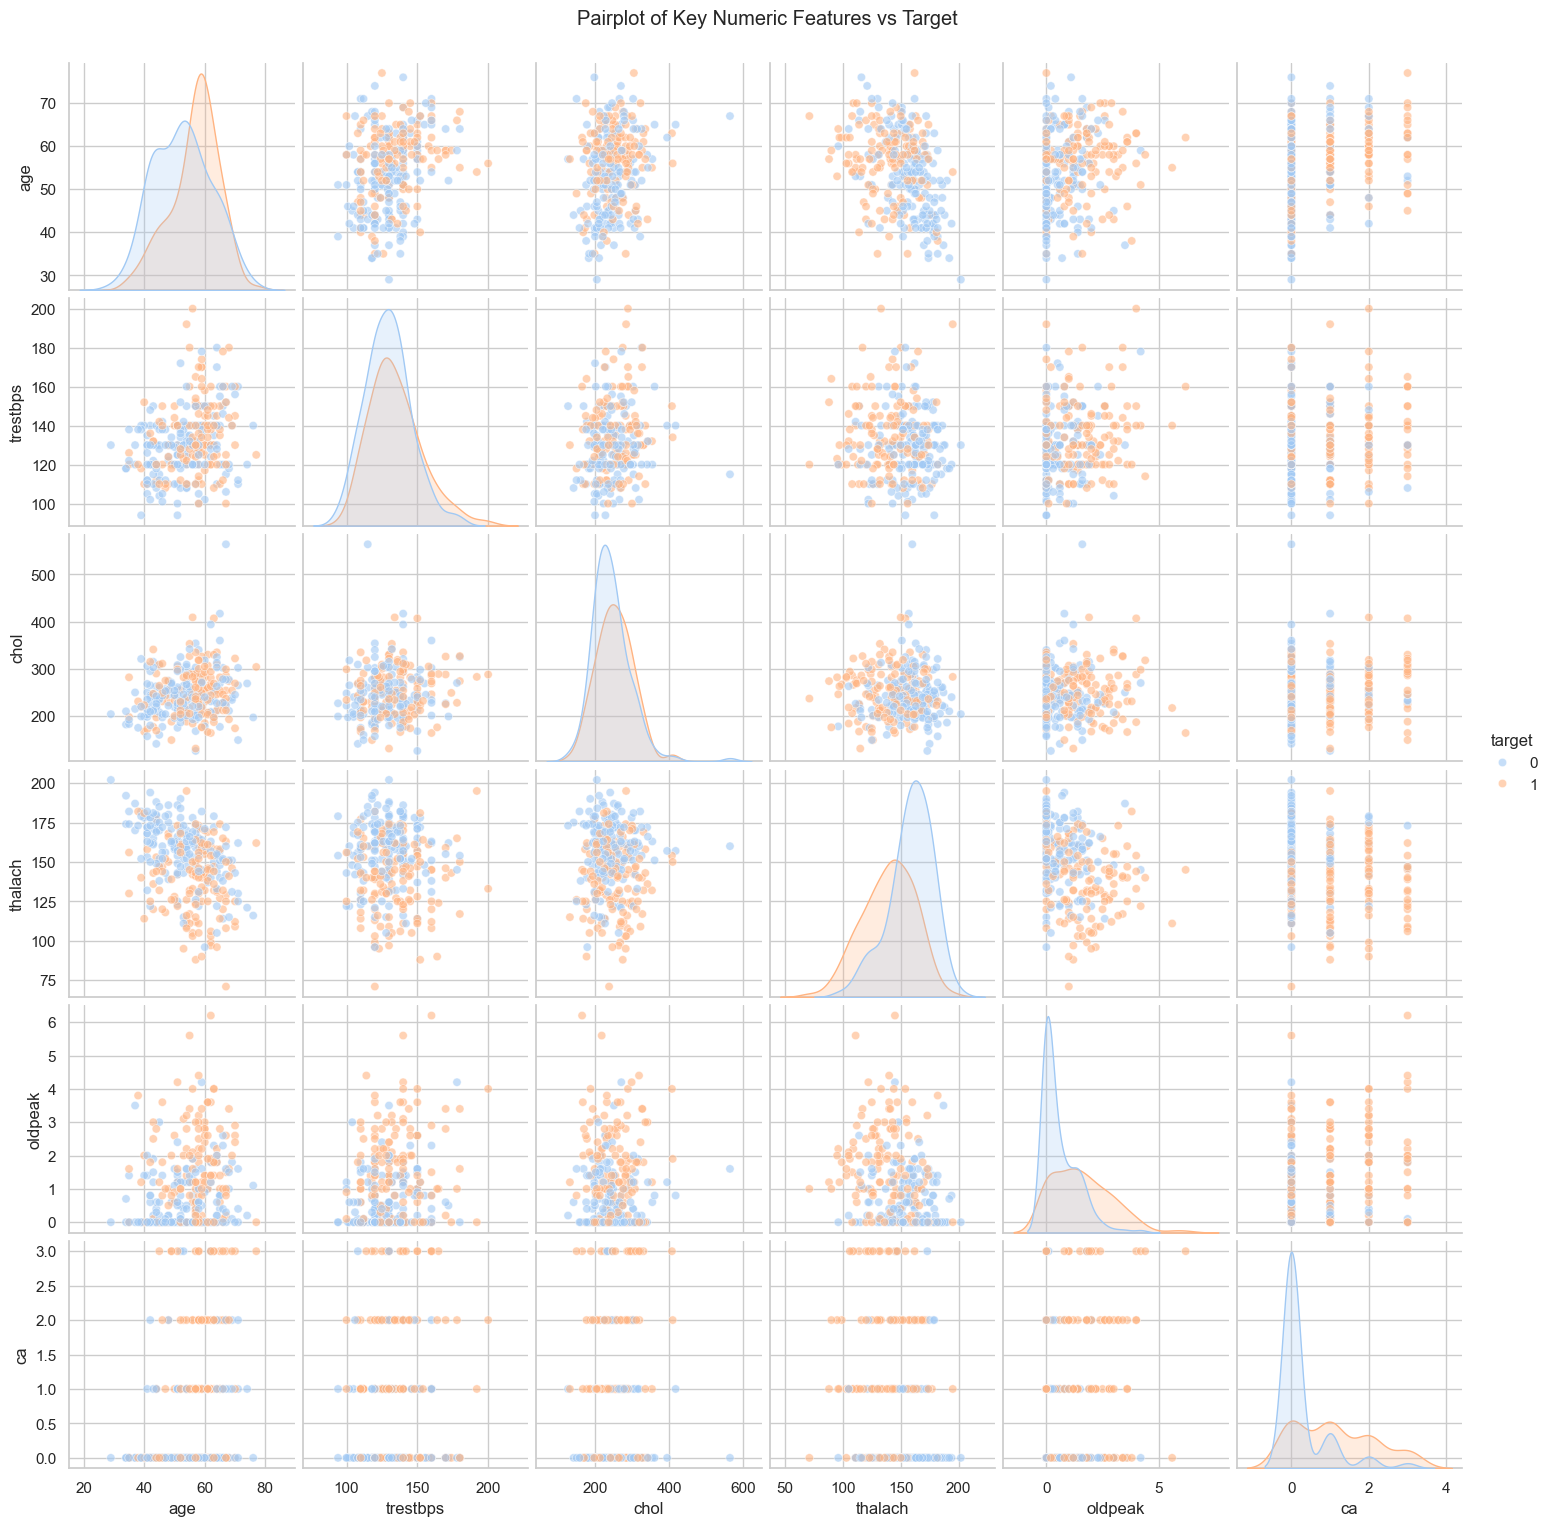

In [71]:
sns.pairplot(df[num_cols + [target_col]], hue=target_col, diag_kind="kde", plot_kws={"alpha":0.6})
plt.suptitle("Pairplot of Key Numeric Features vs Target", y=1.02)
plt.show()

Preprocessing setup (imputation only at this stage)

In [72]:
X = df.drop(columns=[target_col])
y = df[target_col]

numeric_pipe = SimpleImputer(strategy="median")
categorical_pipe = SimpleImputer(strategy="most_frequent")

pre_impute = ColumnTransformer(
    transformers=[
        ("num_impute", numeric_pipe, num_cols),
        ("cat_impute", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# Apply imputers
Xi = pre_impute.fit_transform(X)
X_imputed = pd.DataFrame(Xi, columns=num_cols + cat_cols)

Save cleaned dataset

In [73]:
clean = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)
clean.to_csv("../data/heart_disease_clean.csv", index=False)
print("Saved ../data/heart_disease_clean.csv with shape:", clean.shape)
clean.head()

Saved ../data/heart_disease_clean.csv with shape: (303, 14)


,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,target
0,63.0,145.0,233.0,150.0,2.3,0.0,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1.0,4.0,0.0,2.0,1.0,2.0,3.0,1
2,67.0,120.0,229.0,129.0,2.6,2.0,1.0,4.0,0.0,2.0,1.0,2.0,7.0,1
3,37.0,130.0,250.0,187.0,3.5,0.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0
